In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from eworm.utils import func, data_factory
import seaborn

--No graphics will be displayed.
/home/zhaomengdi/anaconda3/envs/eworm/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


total distance: 2.249254480614184


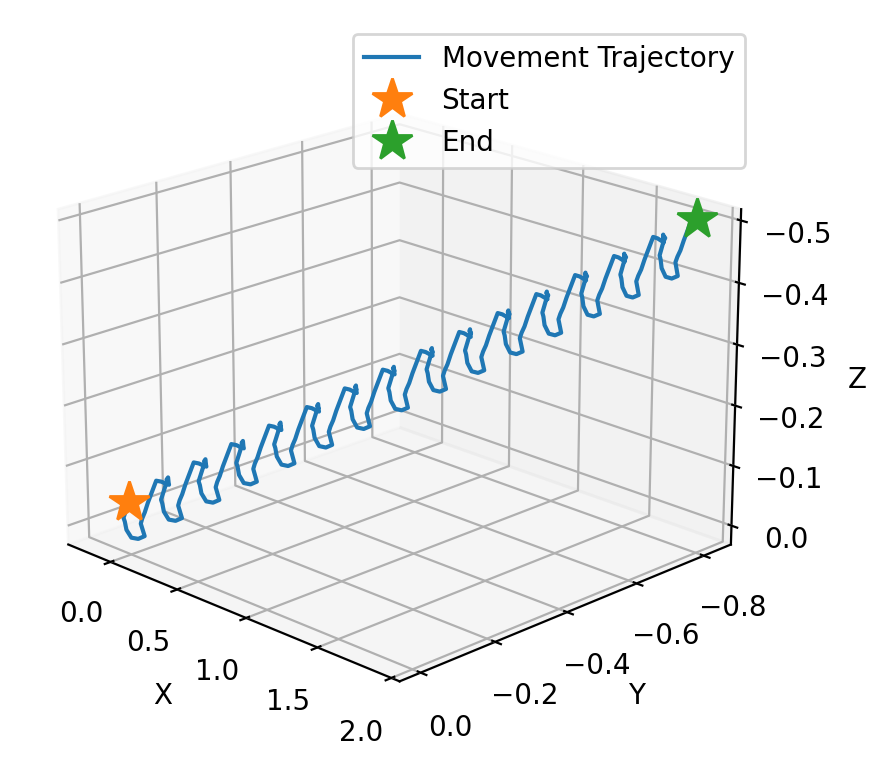

In [3]:
loc_path = os.path.join("..", "ghost_in_mesh_sim", "data", "state", "worm_states_300_220428-152601.json")
location = data_factory.load_location(loc_path)
ax = plt.figure(dpi=200).add_subplot(projection='3d')
ax.plot(location[:,0], location[:,1], location[:,2], label='Movement Trajectory')
ax.plot(location[0,0], location[0,1], location[0,2], '*', markersize=15, label='Start')
ax.plot(location[-1,0], location[-1,1], location[-1,2], '*', markersize=15, label='End')
plt.legend(loc='upper right')
ax.view_init(elev=340, azim=45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig(os.path.join("movement", "movement_trajectory.png"))
print(f"total distance: {np.linalg.norm(location[0,:]-location[-1,:])}")

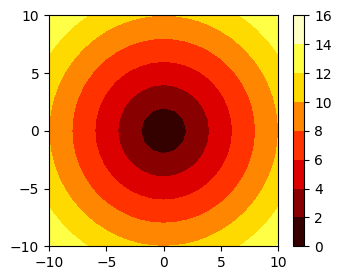

In [4]:
x=np.arange(-10,10.1,1)
y=np.arange(-10,10.1,1)
X,Y=np.meshgrid(x,y)
Z=np.sqrt(X**2+Y**2)

plt.figure(figsize=(3.7,3), dpi=100)
cs = plt.contourf(X, Y, Z, cmap='hot')
plt.xticks([-10,-5,0,5,10])
plt.yticks([-10,-5,0,5,10])
cbar=plt.colorbar()
plt.savefig(os.path.join("movement", "concentration.png"))

In [5]:
online_input_path = os.path.join("movement", "online_input.txt")
online_motor_neuron_path = os.path.join("movement", "online_motor_neuron.txt")
online_muscle_path = os.path.join("movement", "online_muscle.txt")

input_trace = np.array([float(x) for x in open(online_input_path, "r").read().split("\n")])

motor_neuron_trace = [x.split(",") for x in open(online_motor_neuron_path, "r").read().split("\n")]
for i in range(len(motor_neuron_trace)):
    for j in range(len(motor_neuron_trace[0])):
        motor_neuron_trace[i][j] = 0 if motor_neuron_trace[i][j] == '' else float(motor_neuron_trace[i][j])
motor_neuron_trace = np.array(motor_neuron_trace)[:,:-1]

muscle_trace = [x.split(",") for x in open(online_muscle_path, "r").read().split("\n")]
for i in range(len(muscle_trace)):
    for j in range(len(muscle_trace[0])):
        muscle_trace[i][j] = 0 if muscle_trace[i][j] == '' else float(muscle_trace[i][j])
muscle_trace = np.array(muscle_trace)[:,:-1]

window = [300,601]
input_trace = input_trace[window[0]:window[1]]
motor_neuron_trace = motor_neuron_trace[window[0]:window[1]]
muscle_trace = muscle_trace[window[0]:window[1]]
print(input_trace.shape, motor_neuron_trace.shape, muscle_trace.shape)

(301,) (301, 80) (301, 96)


In [11]:
muscle_name = ["DR01","DR02","DR03","DR04","DR05","DR06","DR07","DR08","DR09","DR10","DR11","DR12","DR13","DR14","DR15","DR16","DR17","DR18","DR19","DR20","DR21","DR22","DR23","DR24","VR01","VR02","VR03","VR04","VR05","VR06","VR07","VR08","VR09","VR10","VR11","VR12","VR13","VR14","VR15","VR16","VR17","VR18","VR19","VR20","VR21","VR22","VR23","VR24","DL01","DL02","DL03","DL04","DL05","DL06","DL07","DL08","DL09","DL10","DL11","DL12","DL13","DL14","DL15","DL16","DL17","DL18","DL19","DL20","DL21","DL22","DL23","DL24","VL01","VL02","VL03","VL04","VL05","VL06","VL07","VL08","VL09","VL10","VL11","VL12","VL13","VL14","VL15","VL16","VL17","VL18","VL19","VL20","VL21","VL22","VL23","VL24"]
motor_neuron_name = ["RIML", "RIMR", "RMEL", "RMER", "RMED", "RMEV", "RMDDL", "RMDDR", "RMDL", "RMDR", "RMDVL", "RMDVR", "RIVL", "RIVR", "SMDDL", "SMDDR", "SMDVL", "SMDVR", "SMBDL", "SMBDR", "SMBVL", "SMBVR", "DA01", "DA02", "DA03", "DA04", "DA05", "DA06", "DA07", "DA08", "DA09", "DB01", "DB02", "DB03", "DB04", "DB05", "DB06", "DB07", "DD01", "DD02", "DD03", "DD04", "DD05", "DD06", "VA01", "VA02", "VA03", "VA04", "VA05", "VA06", "VA07", "VA08", "VA09", "VA10", "VA11", "VA12", "VB01", "VB02", "VB03", "VB04", "VB05", "VB06", "VB07", "VB08", "VB09", "VB10", "VB11", "VD01", "VD02", "VD03", "VD04", "VD05", "VD06", "VD07", "VD08", "VD09", "VD10", "VD11", "VD12", "VD13"]
time_trace = np.arange(0, 1/10*len(input_trace), 1/10)
time_trace_name = []
for t in time_trace:
    if np.mod(t,1) < 0.01:
        time_trace_name.append(f'{t:.1f}')
    else:
        time_trace_name.append('')

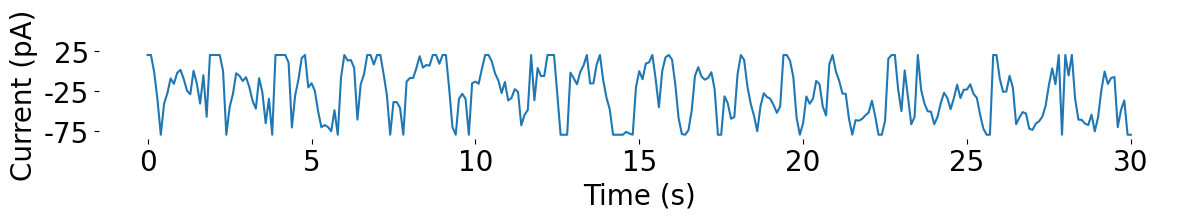

In [123]:
fig, ax = plt.subplots(figsize=(12,2))
fs = 20
ax.plot(time_trace, input_trace*1000)
ax.set_xticks(np.arange(0, 31, 5))
ax.set_xticklabels([str(_) for _ in np.arange(0, 31, 5)], fontsize=fs)
ax.set_yticks(np.arange(-75, 26,  50))
ax.set_yticklabels([str(_) for _ in np.arange(-75, 26, 50)], fontsize=fs)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Time (s)", fontsize=fs)
ax.set_ylabel("Current (pA)", fontsize=fs)
plt.tight_layout()
plt.savefig(os.path.join("movement", f"input.png"), dpi=200)

online muscle signal

In [124]:
def threads_plot(data, y_tick_labels, x_dt, save_dir, overlap_num=2., xlabel="Time (ms)", ylabel=""):
    """
    data: np.array with shape (n_traces, num_step)
    y_tick_labels: list of string, label for each trace
    x_dt: time for each step
    save_dir: path to save the figure
    overlap_num: density of traces overlapping with each other, 1 for no overlapping, 2 for half overlapping
    """
    max_char_len = np.max([len(char_tmp) for char_tmp in y_tick_labels])
    for cell_id in range(len(y_tick_labels)):
        if cell_id % 2 == 0:
            y_tick_labels[cell_id] = y_tick_labels[cell_id].ljust(2 * max_char_len, " ").rjust(max_char_len, " ")
        else:
            y_tick_labels[cell_id] = y_tick_labels[cell_id].ljust(2 * max_char_len, " ").ljust(4 * max_char_len+2, " ")
    max_shift = (np.max(data) - np.min(data)) / overlap_num
    xtick_len = int(np.ceil(int(data.shape[-1] / 5) / 500) * 500)
    xtick_len_minor = int(xtick_len / 10)
    print(xtick_len, xtick_len_minor, data.shape[-1], np.arange(0, data.shape[-1], xtick_len_minor))
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    _, ax = plt.subplots(figsize=(12, 7))
    for trace_id, trace in enumerate(data):
        ax.plot(trace / max_shift + trace_id, lw=0.6, alpha=0.8)
    ax.set_xticks(np.arange(0, data.shape[-1], xtick_len_minor))
    ax.set_xticklabels(np.array(np.arange(0, data.shape[-1], xtick_len_minor) * x_dt, dtype=int), fontsize=15)
    ax.set_yticks(np.arange(data.shape[0])+1, y_tick_labels, fontsize=10)
    for ytick_id, ytick in enumerate(plt.gca().get_yticklabels()):
        ytick.set_color(colors[ytick_id % len(colors)])
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.grid(axis='x', which='minor', alpha=0.2)
    ax.grid(axis='x', which='major', alpha=0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(-xtick_len_minor, data.shape[-1] + xtick_len_minor)
    ax.set_ylim(-1, data.shape[0]+5)
    plt.tight_layout()
    plt.savefig(save_dir, dpi=500)
    plt.close()
threads_plot(muscle_trace.transpose()[::-1], muscle_name[::-1], 0.1, os.path.join("movement", f"muscle_voltage_trace.png"), overlap_num=5, xlabel="Time (s)")

(96, 301)
500 50 301 [  0  50 100 150 200 250 300]


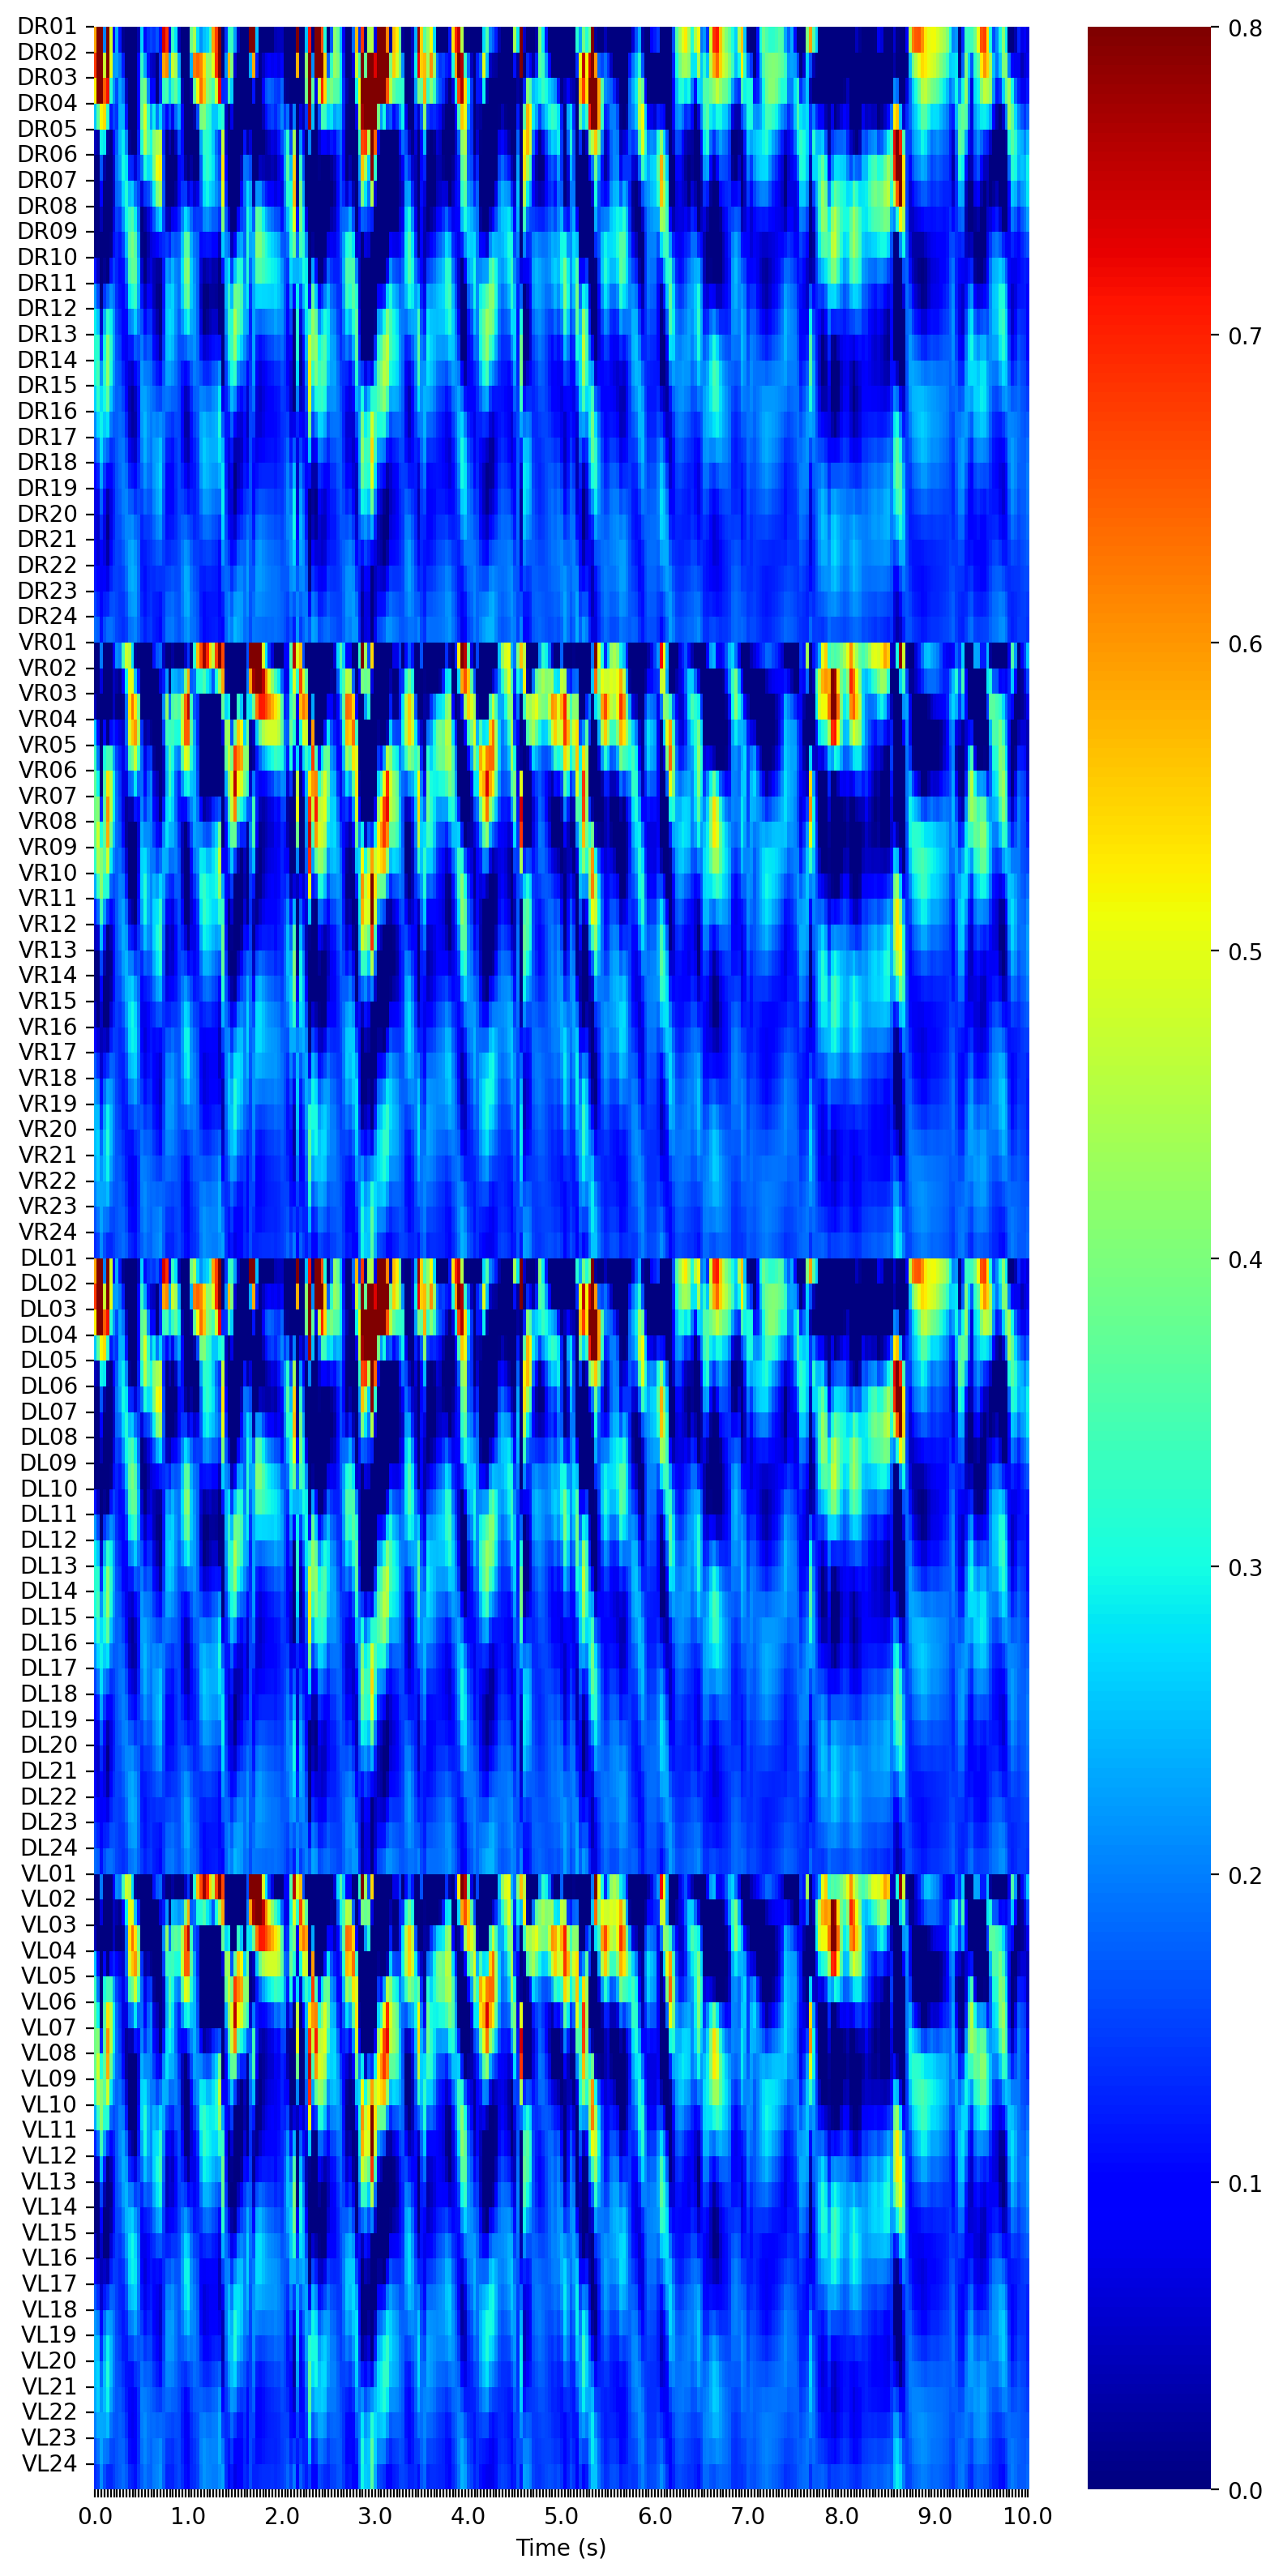

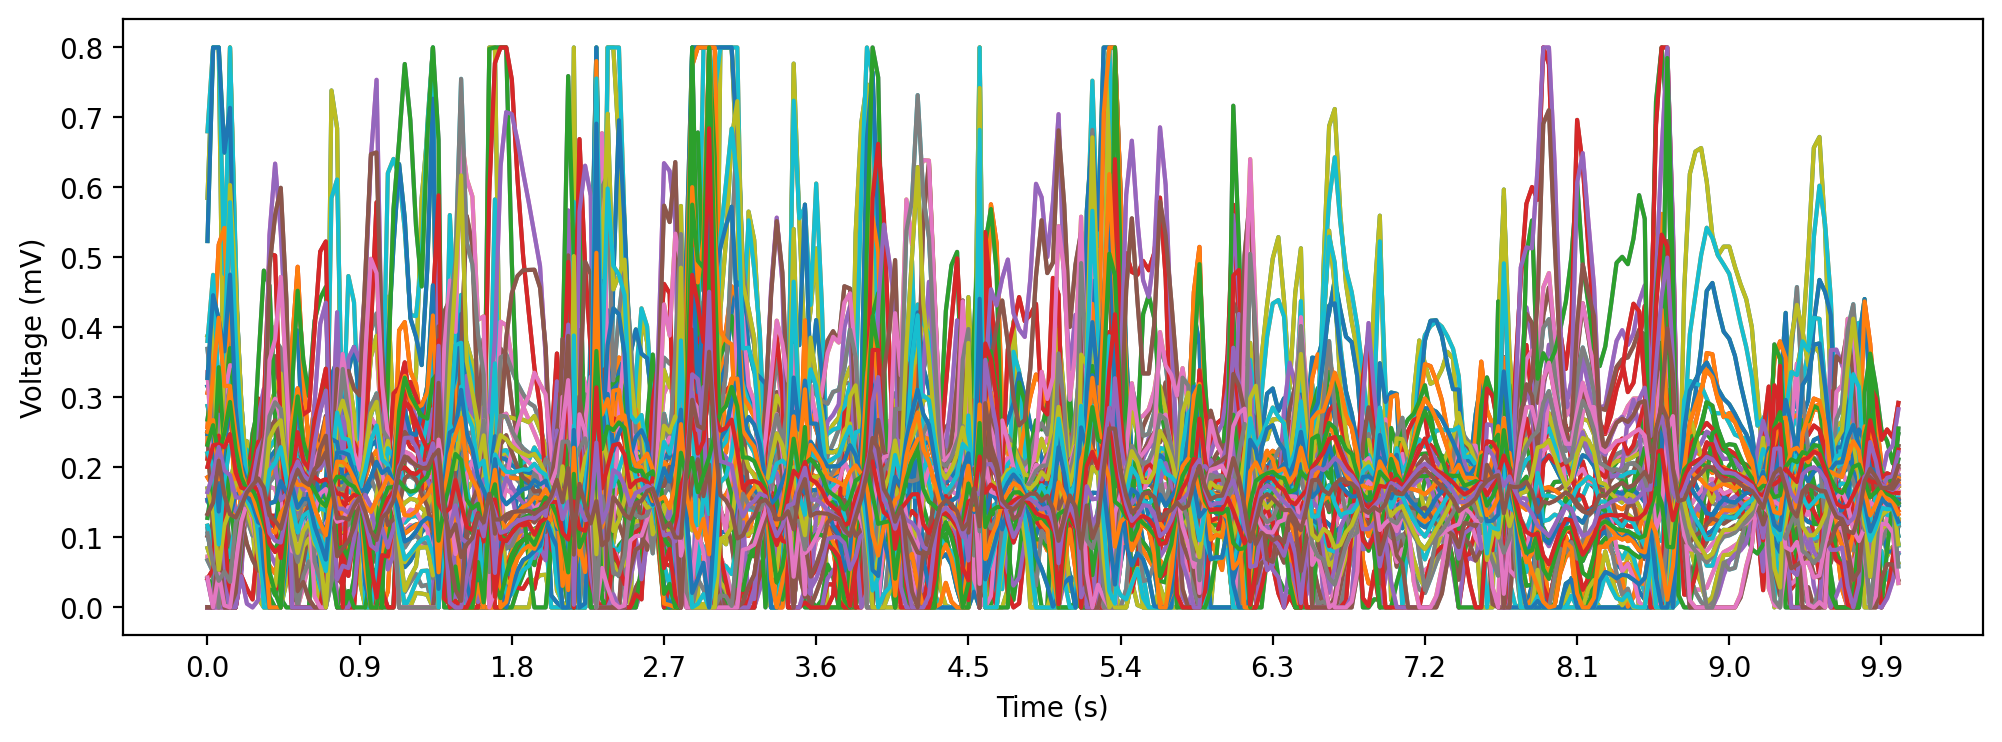

In [39]:
plt.figure(figsize=(8,16), dpi=200)
seaborn.heatmap(muscle_trace.transpose(), xticklabels=time_trace_name, cmap='jet')
plt.yticks([*range(len(muscle_name))], muscle_name, rotation ='horizontal')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig(os.path.join("movement", f"muscle_heatmap.png"))
plt.figure(figsize=(12,4), dpi=200)
for v, cn in zip(muscle_trace.transpose(), muscle_name):
    plt.plot(time_trace, v, label=cn)
plt.xticks(np.arange(0, 10, 0.9))
# plt.xlim(0.8,10.3)
# plt.ylim(-90, 10)
# plt.legend(ncol=5)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.savefig(os.path.join("movement", f"muscle_voltage.png"))

online motor neuron voltage

In [110]:
def threads_plot(data, y_tick_labels, x_dt, save_dir, overlap_num=2., xlabel="Time (ms)", ylabel=""):
    """
    data: np.array with shape (n_traces, num_step)
    y_tick_labels: list of string, label for each trace
    x_dt: time for each step
    save_dir: path to save the figure
    overlap_num: density of traces overlapping with each other, 1 for no overlapping, 2 for half overlapping
    """
    max_char_len = np.max([len(char_tmp) for char_tmp in y_tick_labels])
    for cell_id in range(len(y_tick_labels)):
        if cell_id % 2 == 0:
            y_tick_labels[cell_id] = y_tick_labels[cell_id].ljust(2 * max_char_len, " ").rjust(max_char_len, " ")
        else:
            y_tick_labels[cell_id] = y_tick_labels[cell_id].ljust(2 * max_char_len, " ").ljust(4 * max_char_len+2, " ")
    max_shift = (np.max(data) - np.min(data)) / overlap_num
    xtick_len = int(np.ceil(int(data.shape[-1] / 5) / 500) * 500)
    xtick_len_minor = int(xtick_len / 10)
    print(xtick_len, xtick_len_minor, data.shape[-1], np.arange(0, data.shape[-1], xtick_len_minor))
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    _, ax = plt.subplots(figsize=(10, 6))
    for trace_id, trace in enumerate(data):
        ax.plot(trace / max_shift + trace_id, lw=0.6, alpha=0.8)
    ax.set_xticks(np.arange(0, data.shape[-1], xtick_len_minor))
    ax.set_xticklabels(np.array(np.arange(0, data.shape[-1], xtick_len_minor) * x_dt, dtype=int), fontsize=15)
    ax.set_yticks(np.arange(data.shape[0])-2, y_tick_labels, fontsize=10)
    for ytick_id, ytick in enumerate(plt.gca().get_yticklabels()):
        ytick.set_color(colors[ytick_id % len(colors)])
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.grid(axis='x', which='minor', alpha=0.2)
    ax.grid(axis='x', which='major', alpha=0.5)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # ax.set_xlim(-xtick_len_minor, data.shape[-1] + xtick_len_minor)
    ax.set_ylim(-4, data.shape[0]+2)
    plt.tight_layout()
    plt.savefig(save_dir, dpi=500)
    plt.close()

threads_plot(motor_neuron_trace.transpose()[::-1], motor_neuron_name[::-1], 0.1, os.path.join("movement", f"motor_neuron_voltage_trace.png"), overlap_num=7, xlabel="Time (s)")

500 50 301 [  0  50 100 150 200 250 300]


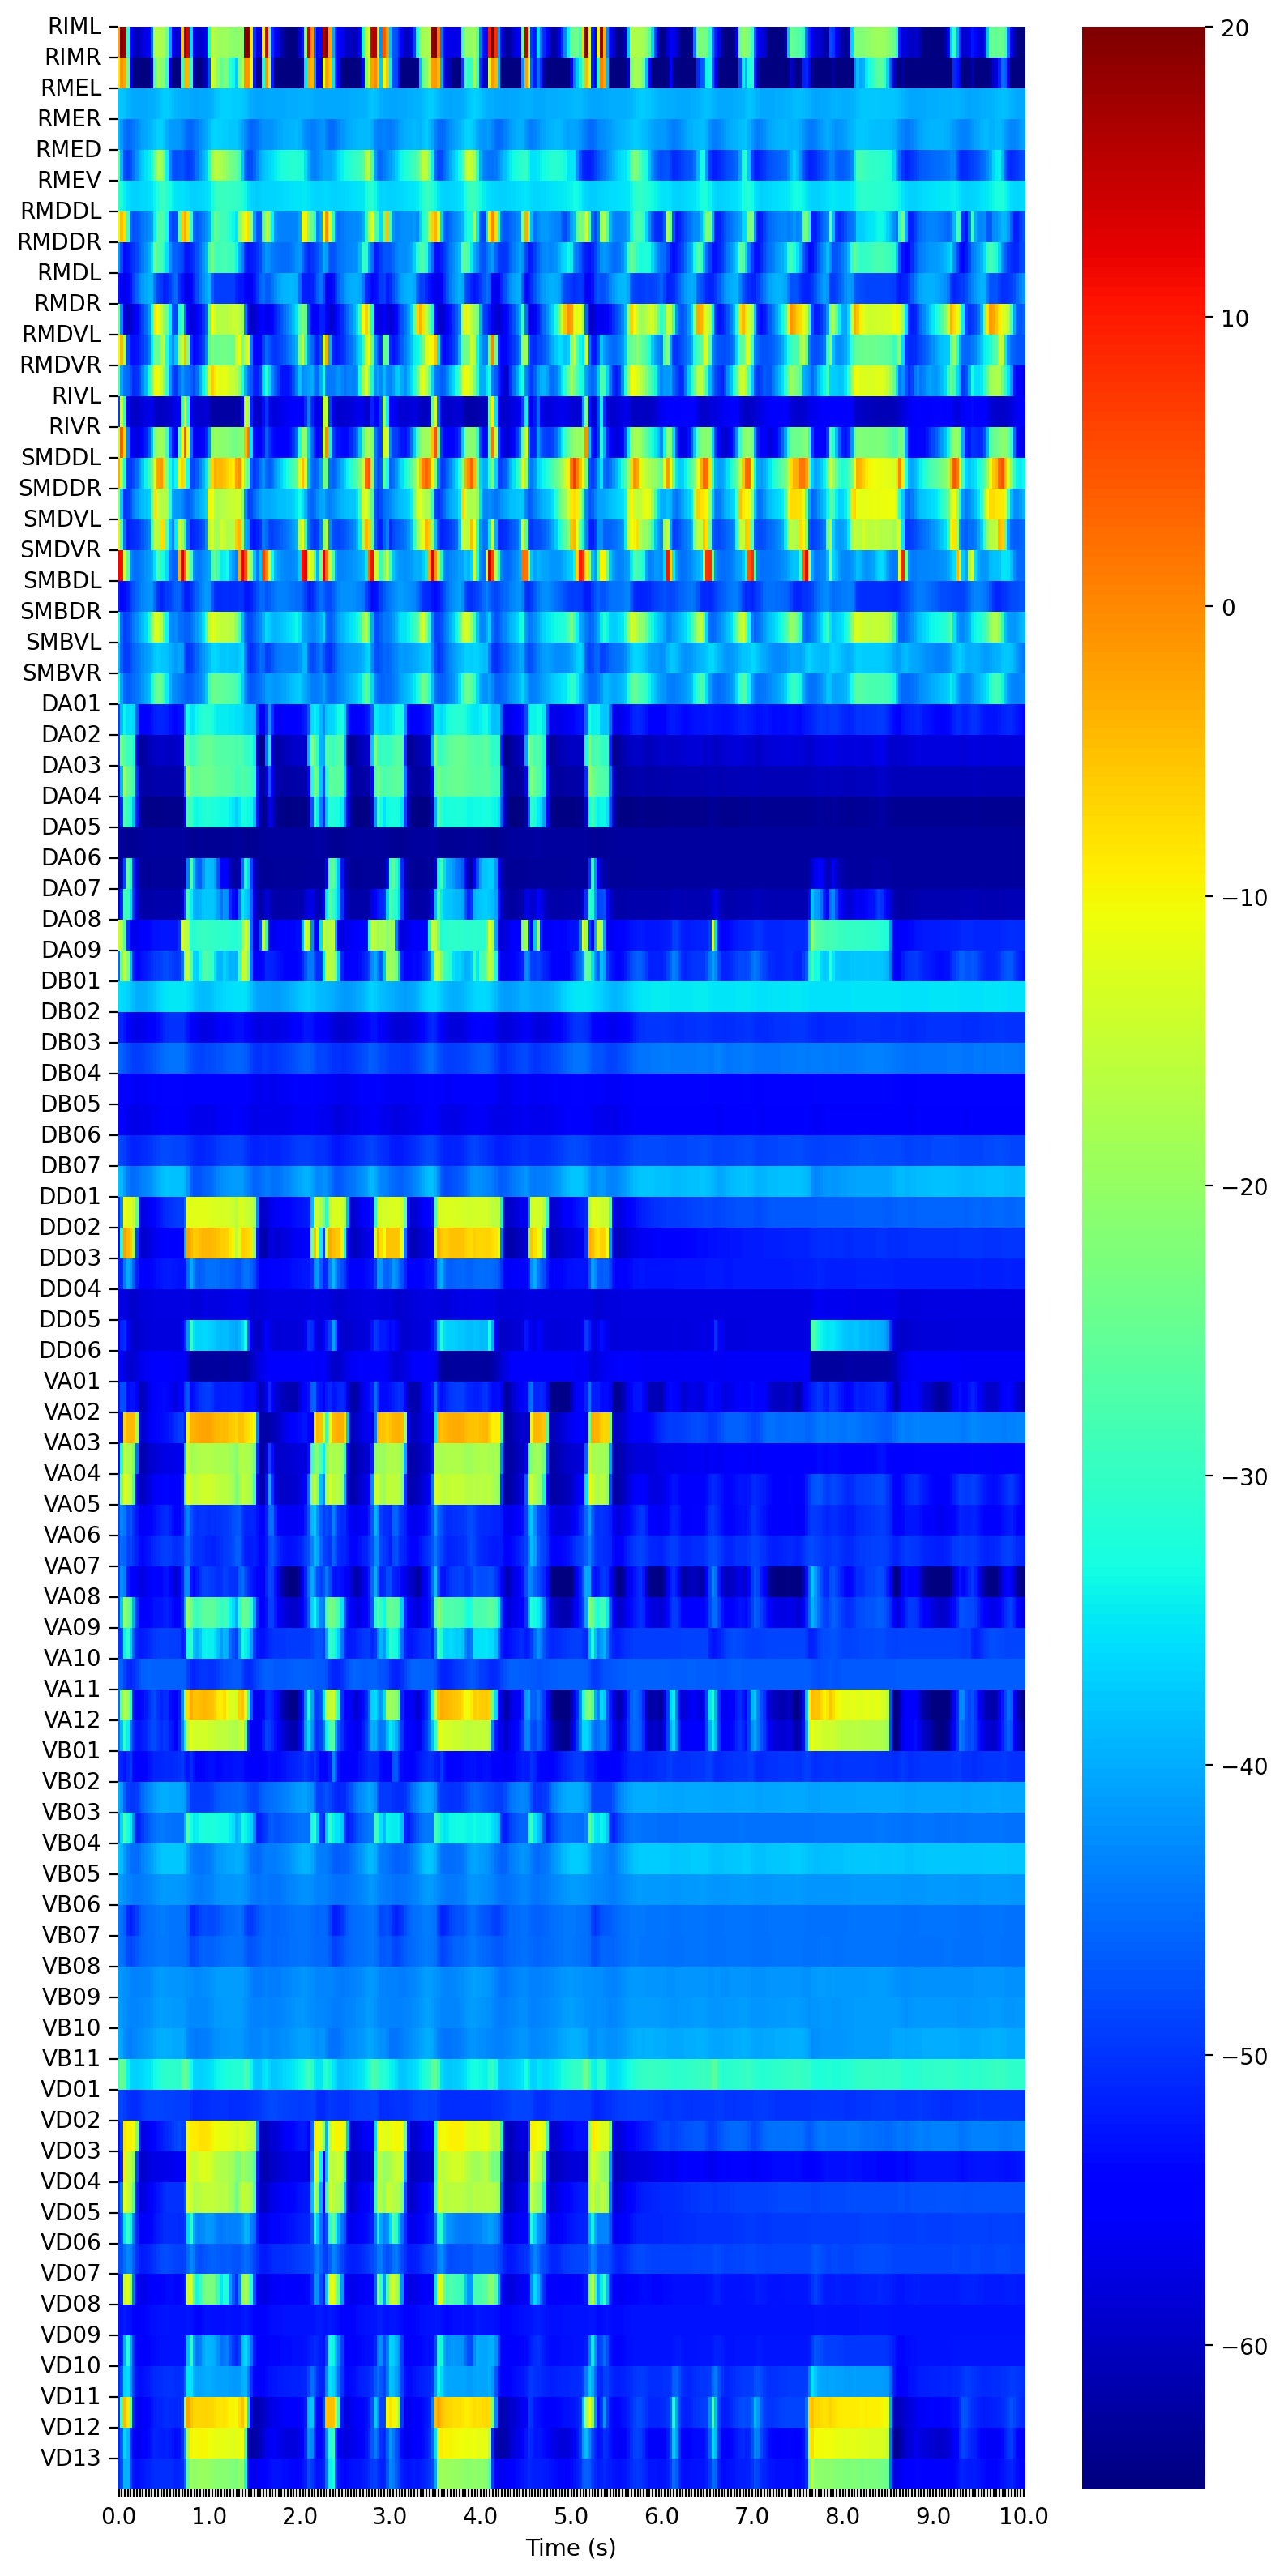

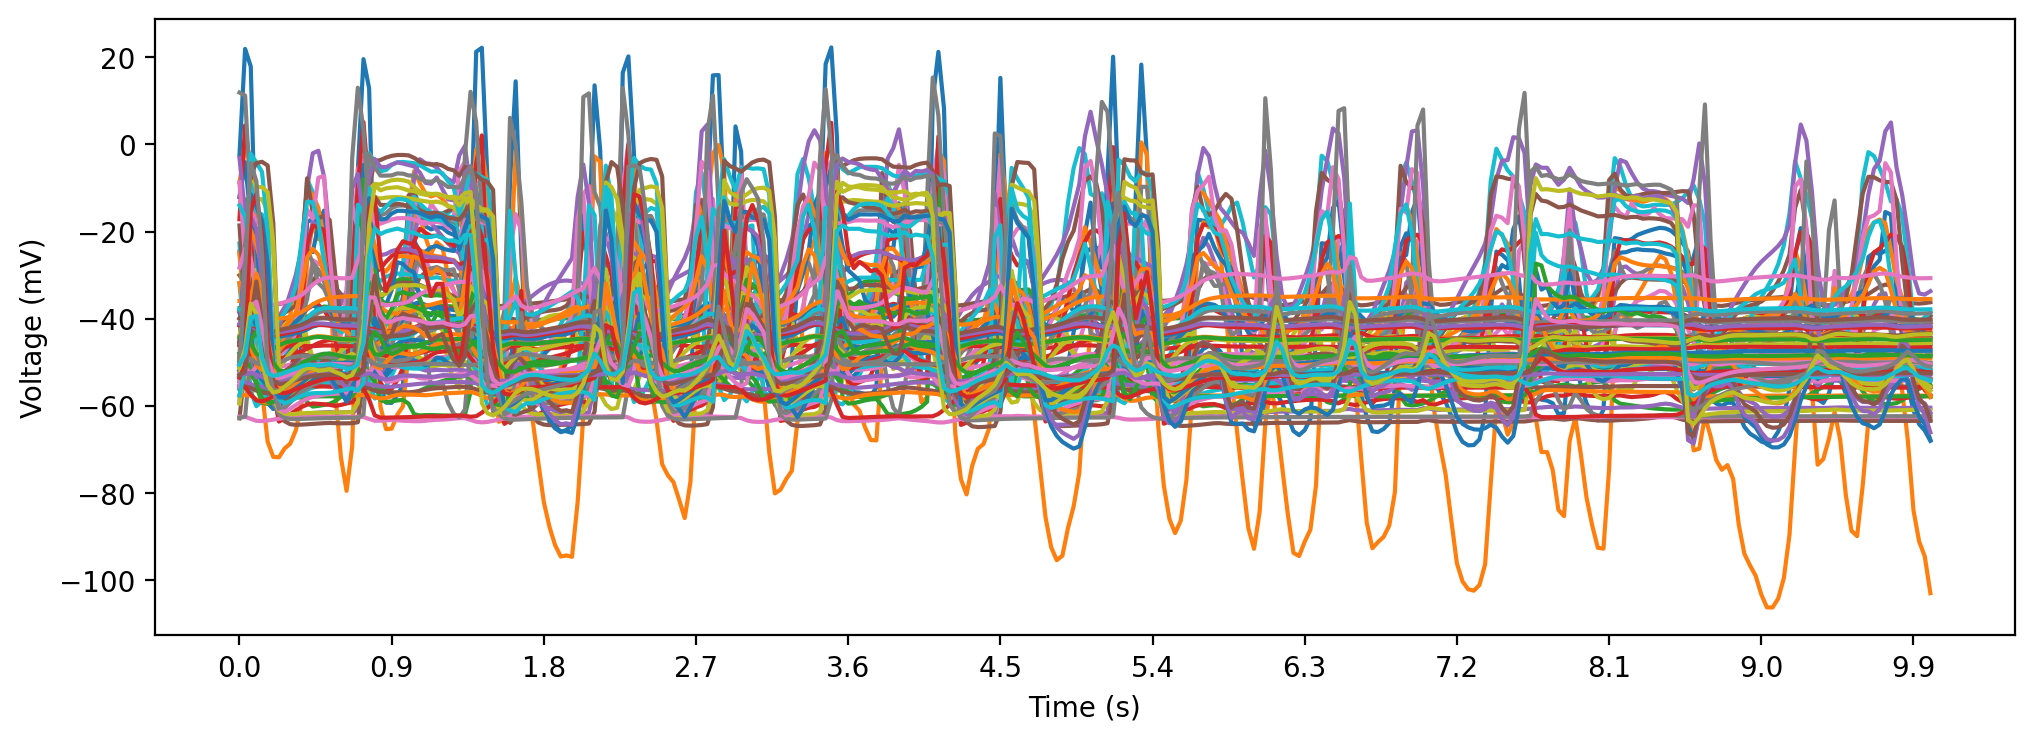

In [43]:
plt.figure(figsize=(8,16), dpi=200)
seaborn.heatmap(motor_neuron_trace.transpose(), xticklabels=time_trace_name, cmap='jet', vmin=-65, vmax=20)
plt.yticks([*range(len(motor_neuron_name))], motor_neuron_name, rotation ='horizontal')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig(os.path.join("movement", f"motor_neuron_heatmap.png"))
plt.figure(figsize=(12,4), dpi=200)
for v, cn in zip(motor_neuron_trace.transpose(), motor_neuron_name):
    plt.plot(time_trace, v, label=cn)
plt.xticks(np.arange(0, 10, 0.9))
# plt.xlim(0.8,10.3)
# plt.ylim(-90, 10)
# plt.legend(ncol=5)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.savefig(os.path.join("movement", f"motor_neuron_voltage.png"))

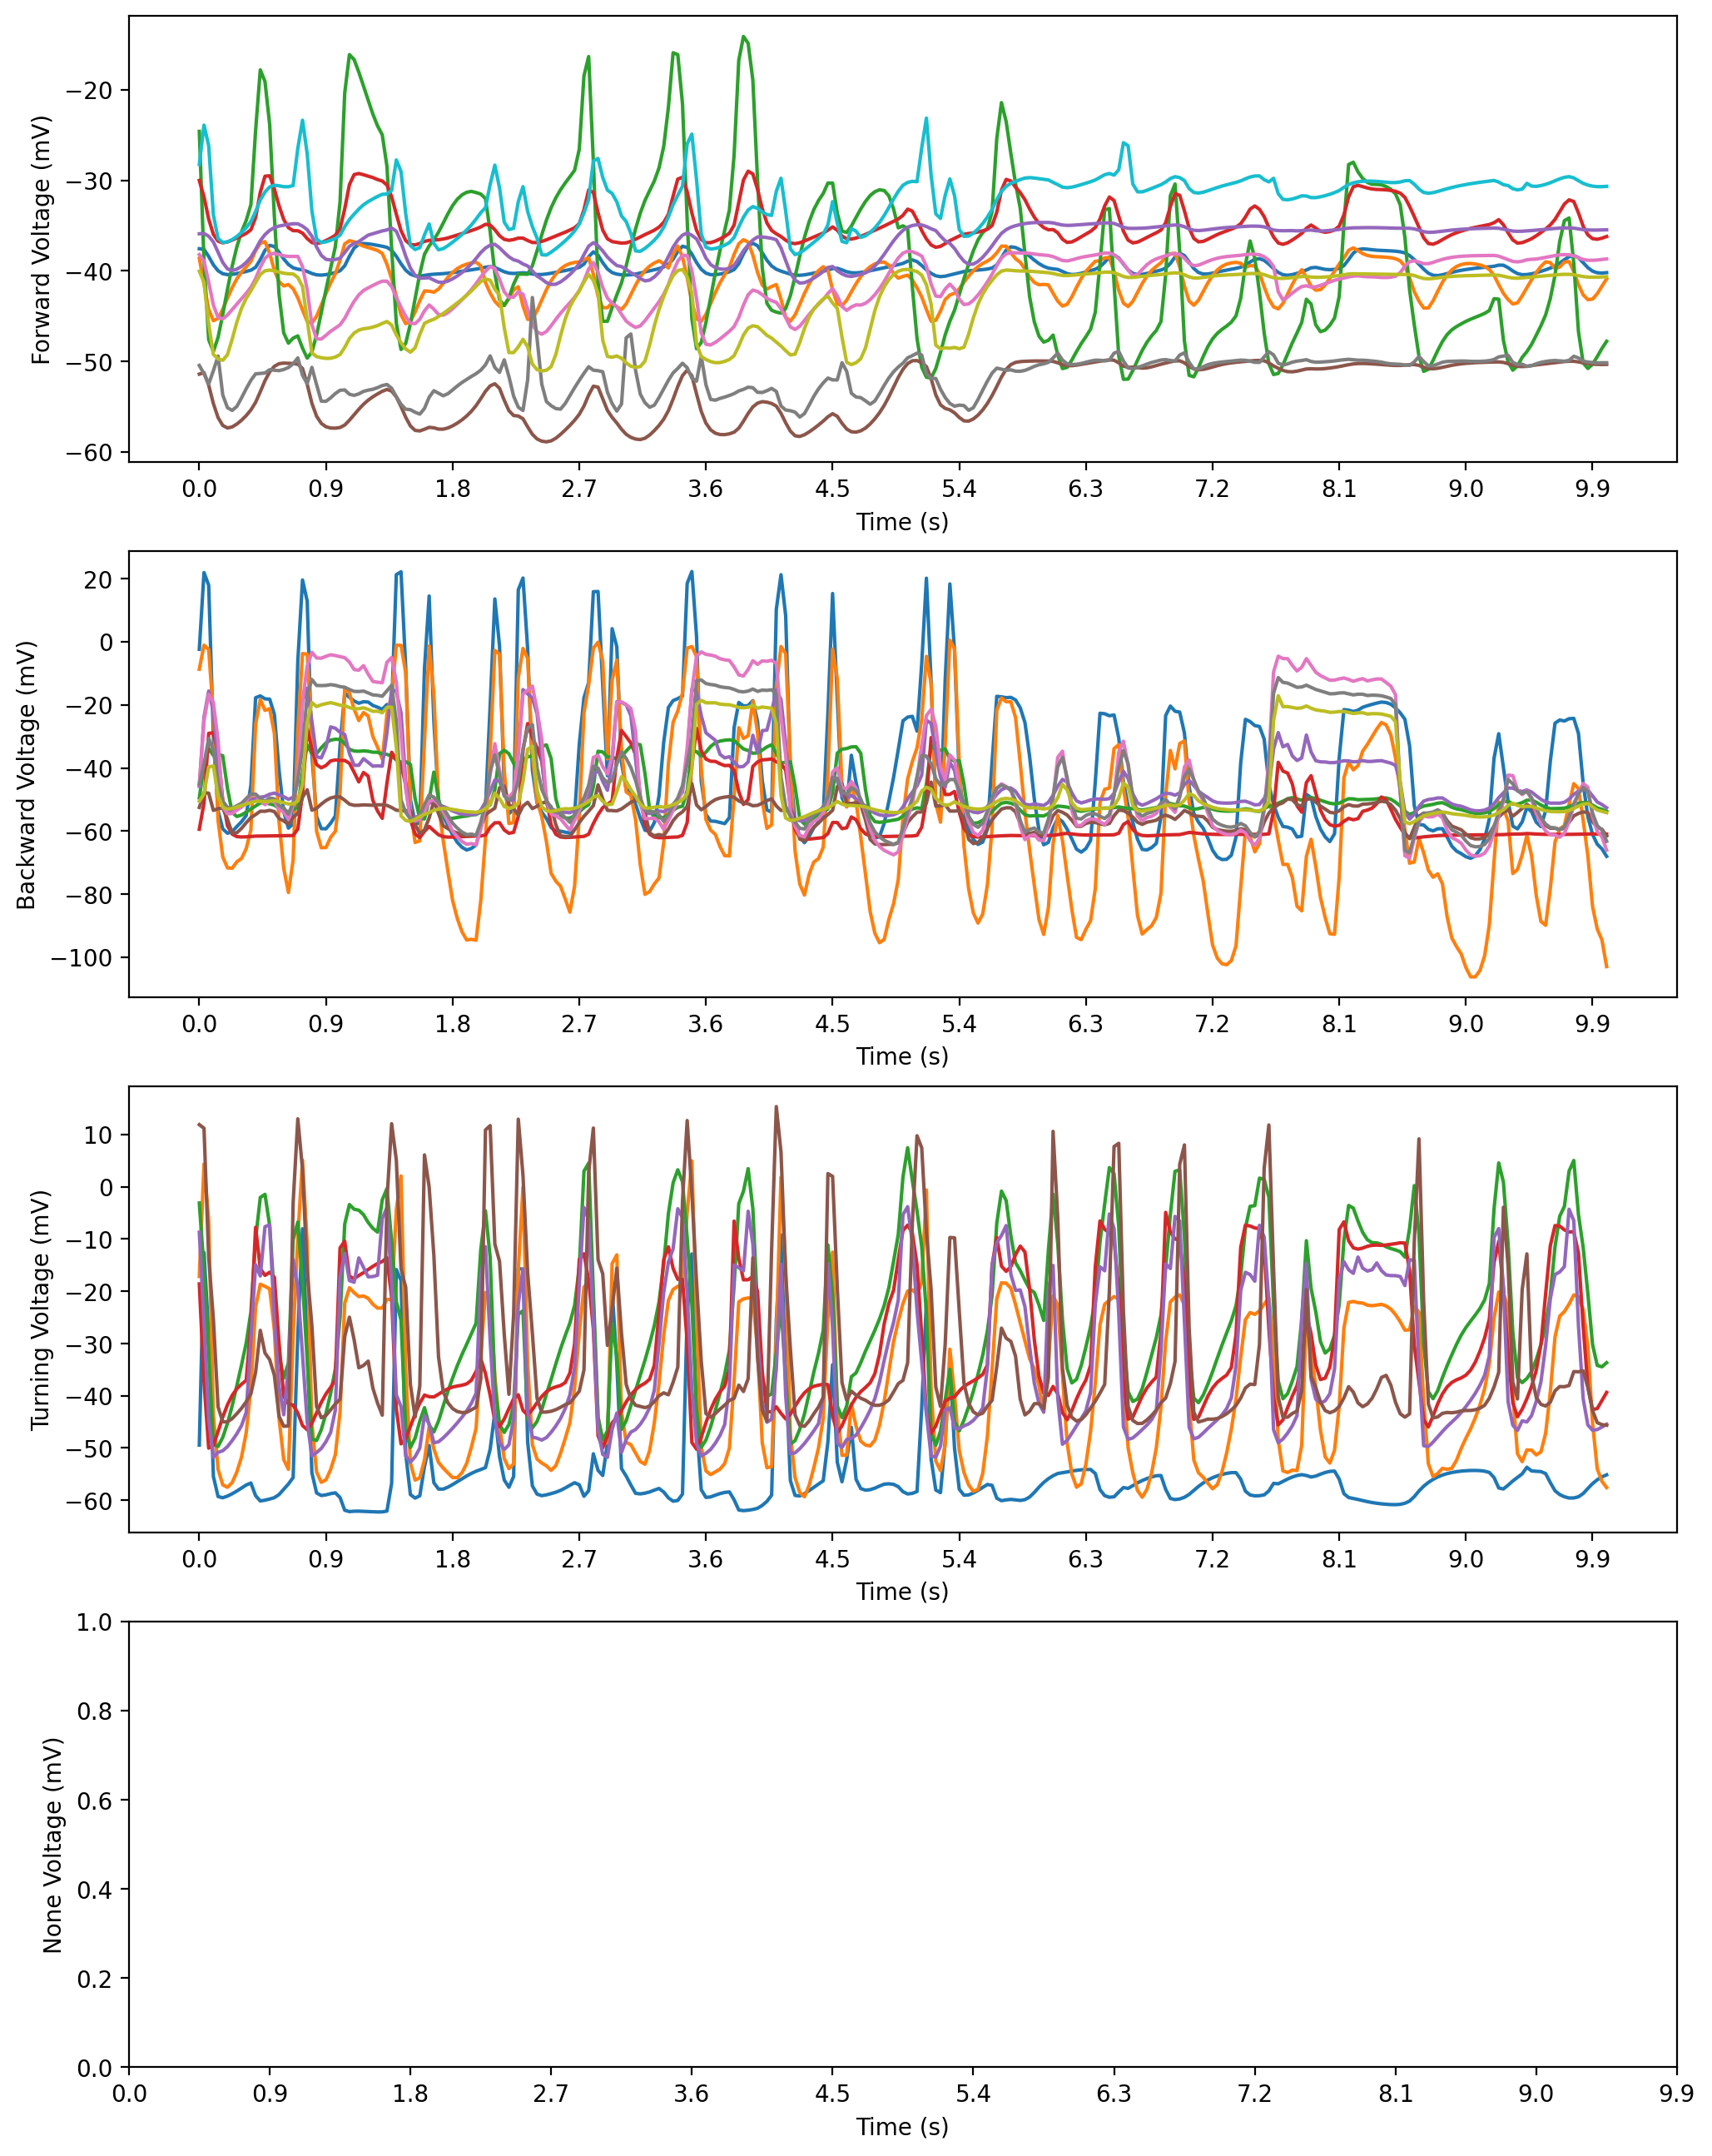

In [11]:
backward_cell = ["AVAL", "AVAR", "RIML", "RIMR", "AIBL", "AIBR", "AVEL", "AVER", "AS10", "VA11", "DA07", "VA12", "DA09", "VD13", "SABD", "DA01", "SABVL", "URYDL", "URYDR", "URYVR", "URYVL", "SABVR", "VA01"]
turning_cell = ["RIVL","RIVR","SMDVL","SMDVR","SMDDL","SMDDR"]
none_cell = ["ALA", "ASKL", "ASKR", "PDA", "PHAL", "PHAR", "DVB", "DVC", "AVFL", "AVFR"]
forward_cell = ["ALNL", "ALNR", "AVBL", "AVBR", "RID", "RIBL", "RIBR", "DB07", "VB11", "PVNL", "DVA", "SIADL", "SIAVL", "SIAVR", "SIADR", "DB02", "VB02", "RMEV", "RMED", "RMEL", "RIS", "PLML", "DB01", "VB01", "PVNR", "RMER"]

plt.figure(figsize=(12,16), dpi=200)
for i, (l, ln) in enumerate(zip([forward_cell, backward_cell, turning_cell, none_cell], ["Forward", "Backward", "Turning", "None"])):
    plt.subplot(4,1,i+1)
    for v, cn in zip(motor_neuron_trace.transpose(), motor_neuron_name):
        if cn in l:
            plt.plot(time_trace, v, label=cn)
    plt.xticks(np.arange(0, 10, 0.9))
    plt.xlabel("Time (s)")
    plt.ylabel(f"{ln} Voltage (mV)")
plt.savefig(os.path.join("movement", f"motor_neuron_voltage_classify.png"))



In [31]:
import pickle

circuit = pickle.load(open("/home/zhaomengdi/Project/model_meta_worm/eworm/ghost_in_mesh_sim/output/forward/forward_abscircuit.pkl", "rb"))
direction = "backward"
online_input_path = os.path.join("movement", direction, "forfigure_input.txt")
online_motor_neuron_path = os.path.join("movement", direction, "forfigure_motor_neuron.txt")
online_neuron_path = os.path.join("movement", direction, "forfigure_neuron.txt")
online_muscle_path = os.path.join("movement", direction, "forfigure_muscle.txt")

input_trace = np.array([float(x) for x in open(online_input_path, "r").read().split("\n")])

motor_neuron_trace = [x.split(",") for x in open(online_motor_neuron_path, "r").read().split("\n")]
for i in range(len(motor_neuron_trace)):
    for j in range(len(motor_neuron_trace[0])):
        motor_neuron_trace[i][j] = 0 if motor_neuron_trace[i][j] == '' else float(motor_neuron_trace[i][j])
motor_neuron_trace = np.array(motor_neuron_trace)[:,:-1]

neuron_trace = [x.split(",") for x in open(online_neuron_path, "r").read().split("\n")]
for i in range(len(neuron_trace)):
    for j in range(len(neuron_trace[0])):
        neuron_trace[i][j] = 0 if neuron_trace[i][j] == '' else float(neuron_trace[i][j])
neuron_trace_tmp = np.array(neuron_trace)[:,:-1]
ids = []
cns = []
cnt = 0
for cell in circuit.cells:
    cns.append(cell.name)
    for seg in cell.segments:
        if "Soma" in seg.name:
            ids.append(cnt)
        cnt += 1
neuron_trace = neuron_trace_tmp[:,ids]

muscle_trace = [x.split(",") for x in open(online_muscle_path, "r").read().split("\n")]
for i in range(len(muscle_trace)):
    for j in range(len(muscle_trace[0])):
        muscle_trace[i][j] = 0 if muscle_trace[i][j] == '' else float(muscle_trace[i][j])
muscle_trace = np.array(muscle_trace)[:,:-1]

window = [99,469]
input_trace = input_trace[window[0]:window[1]]
motor_neuron_trace = motor_neuron_trace[window[0]:window[1]]
neuron_trace = neuron_trace[window[0]:window[1]]
muscle_trace = muscle_trace[window[0]:window[1]]
print(input_trace.shape, motor_neuron_trace.shape, neuron_trace.shape, muscle_trace.shape)


time_trace = np.arange(0, 1/30*len(input_trace), 1/30)
time_trace_name = []
for t in time_trace:
    if np.mod(t,1) < 0.01:
        time_trace_name.append(f'{t:.1f}')
    else:
        time_trace_name.append('')

(370,) (370, 80) (370, 136) (370, 96)


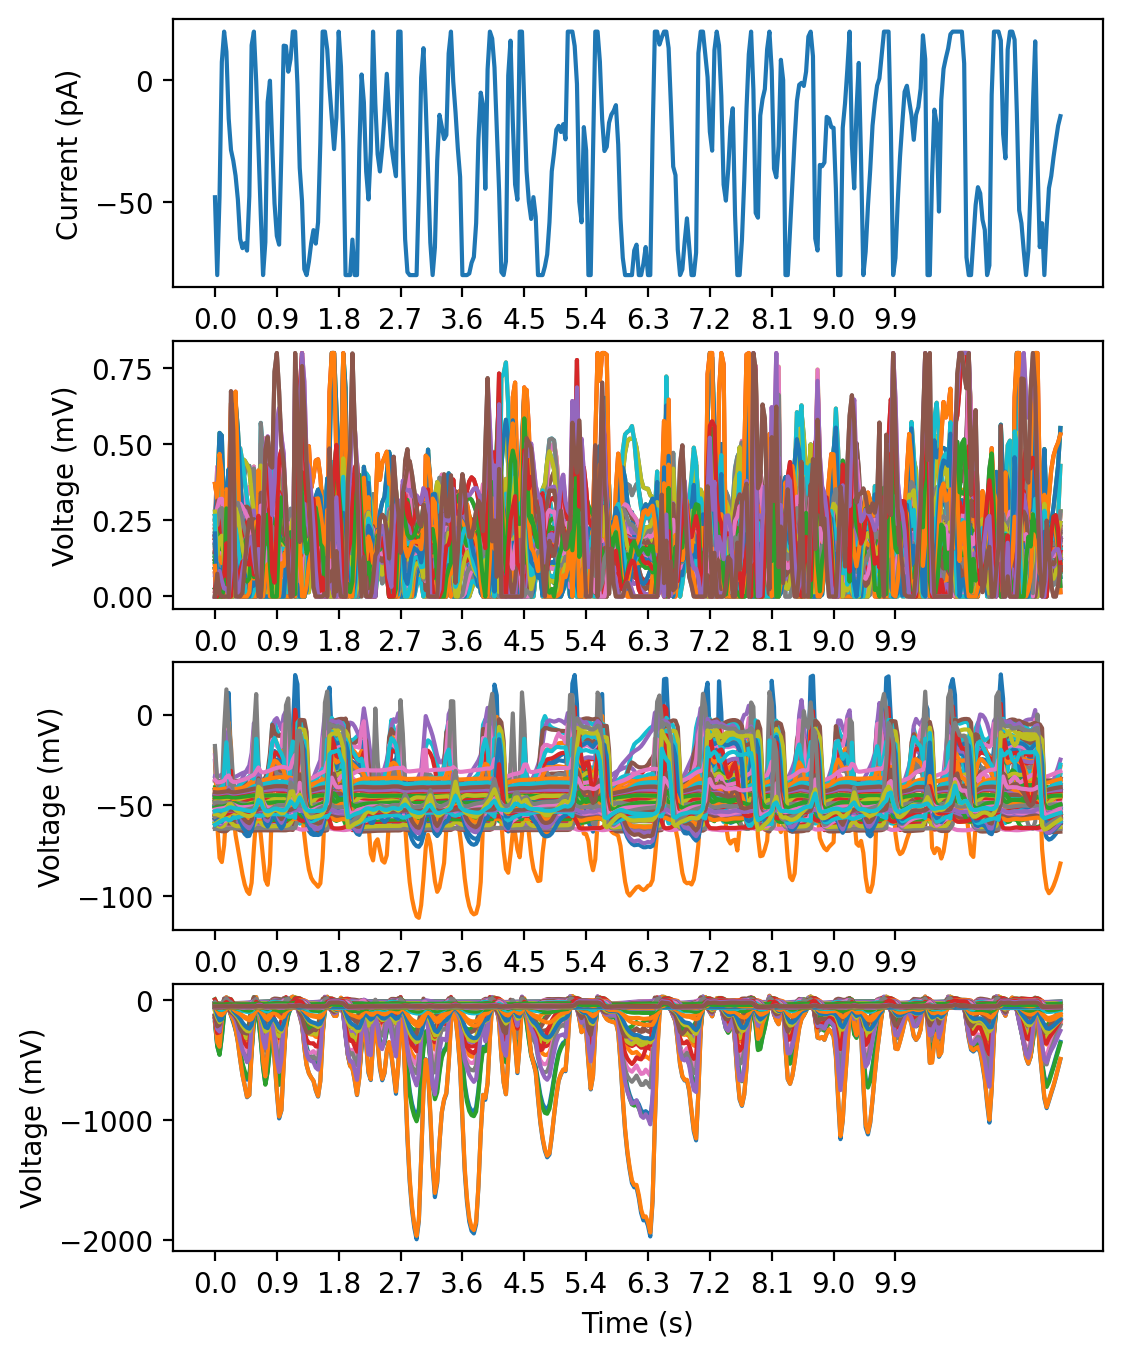

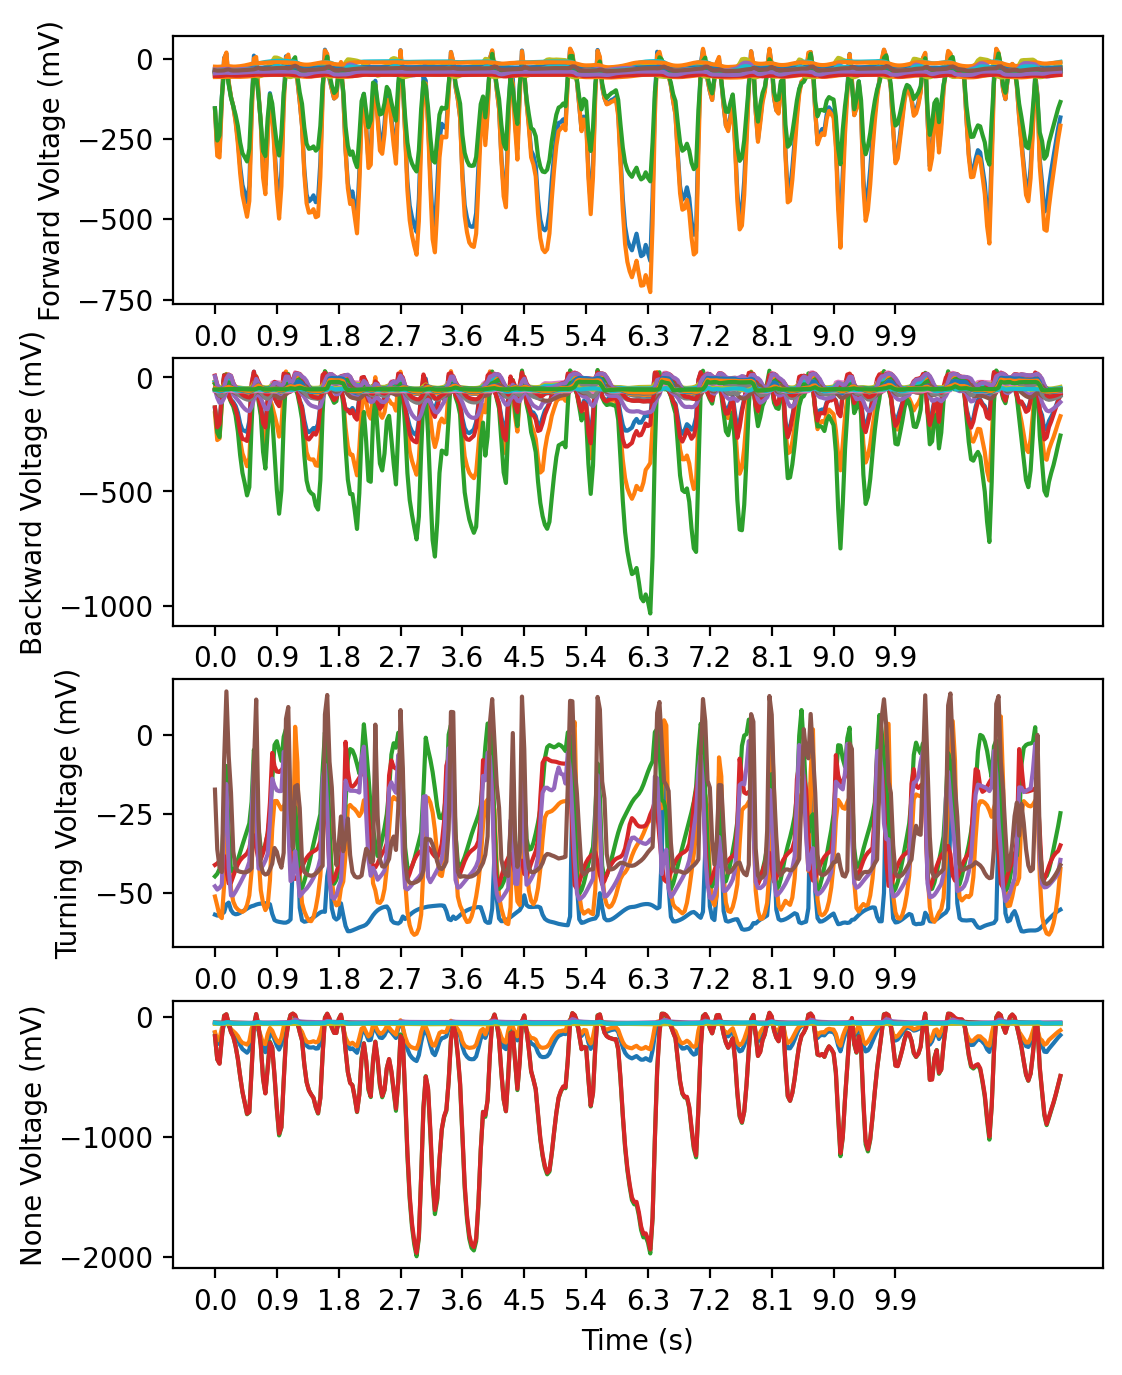

In [32]:
plt.figure(figsize=(6,8), dpi=200)
plt.subplot(4,1,1)
plt.plot(time_trace, input_trace*1000)
plt.xticks(np.arange(0, 10, 0.9))
plt.xlabel("Time (s)")
plt.ylabel("Current (pA)")
# plt.savefig(os.path.join("movement", f"input.png"))

plt.subplot(4,1,2)
for v, cn in zip(muscle_trace.transpose(), muscle_name):
    plt.plot(time_trace, v, label=cn)
plt.xticks(np.arange(0, 10, 0.9))
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
# plt.savefig(os.path.join("movement", f"muscle_voltage.png"))

plt.subplot(4,1,3)
for v, cn in zip(motor_neuron_trace.transpose(), motor_neuron_name):
    plt.plot(time_trace, v, label=cn)
plt.xticks(np.arange(0, 10, 0.9))
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
# plt.savefig(os.path.join("movement", f"motor_neuron_voltage.png"))

plt.subplot(4,1,4)
for v, cn in zip(neuron_trace.transpose(), cns):
    plt.plot(time_trace, v, label=cn)
plt.xticks(np.arange(0, 10, 0.9))
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.savefig(os.path.join("movement", direction, "fig.png"))


backward_cell = ["AVAL", "AVAR", "RIML", "RIMR", "AIBL", "AIBR", "AVEL", "AVER", "AS10", "VA11", "DA07", "VA12", "DA09", "VD13", "SABD", "DA01", "SABVL", "URYDL", "URYDR", "URYVR", "URYVL", "SABVR", "VA01"]
turning_cell = ["RIVL","RIVR","SMDVL","SMDVR","SMDDL","SMDDR"]
none_cell = ["ALA", "ASKL", "ASKR", "PDA", "PHAL", "PHAR", "DVB", "DVC", "AVFL", "AVFR"]
forward_cell = ["ALNL", "ALNR", "AVBL", "AVBR", "RID", "RIBL", "RIBR", "DB07", "VB11", "PVNL", "DVA", "SIADL", "SIAVL", "SIAVR", "SIADR", "DB02", "VB02", "RMEV", "RMED", "RMEL", "RIS", "PLML", "DB01", "VB01", "PVNR", "RMER"]

plt.figure(figsize=(6,8), dpi=200)
for i, (l, ln) in enumerate(zip([forward_cell, backward_cell, turning_cell, none_cell], ["Forward", "Backward", "Turning", "None"])):
    plt.subplot(4,1,i+1)
    for v, cn in zip(neuron_trace.transpose(), cns):
        if cn in l:
            plt.plot(time_trace, v, label=cn)
    plt.xticks(np.arange(0, 10, 0.9))
    plt.xlabel("Time (s)")
    plt.ylabel(f"{ln} Voltage (mV)")
plt.savefig(os.path.join("movement", direction, "motor_neuron_voltage_classify.png"))